Setup and Imports

In [10]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import random

# Set working directory to project root (adjust this path as needed)
os.chdir("/Users/srinika/Desktop/Neural Graphology")
print(f"Current directory: {os.getcwd()}")

# For inline plotting in Jupyter notebooks
%matplotlib inline

Current directory: /Users/srinika/Desktop/Neural Graphology


Load Labels CSV

In [11]:
# Path to the labels CSV
labels_path = "data/processed/labels.csv"

# Load CSV into a DataFrame
df = pd.read_csv(labels_path)

print(f"Total samples: {len(df)}")
df.head()

Total samples: 1933


,filename,user_id,is_genuine,gender,age_group
0,genuine/024_21_024.PNG,24,1,0,0
1,genuine/024_17_024.PNG,24,1,1,0
2,genuine/024_16_024.PNG,24,1,0,0
3,genuine/024_20_024.PNG,24,1,0,2
4,genuine/024_14_024.PNG,24,1,0,2


Basic Dataset Info

In [12]:
print("Class distribution:")
print(df['is_genuine'].value_counts())

print("\nGender distribution:")
print(df['gender'].value_counts())

print("\nAge group distribution:")
print(df['age_group'].value_counts())

Class distribution:
is_genuine
1    1555
0     378
Name: count, dtype: int64

Gender distribution:
gender
1    998
0    935
Name: count, dtype: int64

Age group distribution:
age_group
2    650
0    643
1    640
Name: count, dtype: int64


Visualize Class Balance

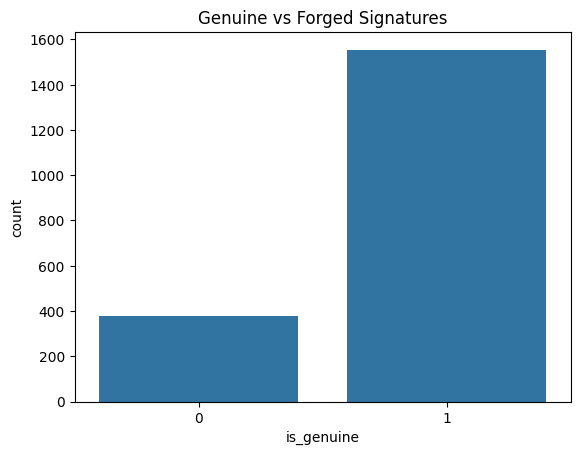

In [13]:
sns.countplot(x='is_genuine', data=df)
plt.title("Genuine vs Forged Signatures")
plt.show()

Show Some Sample Images

Sample Genuine Signatures:


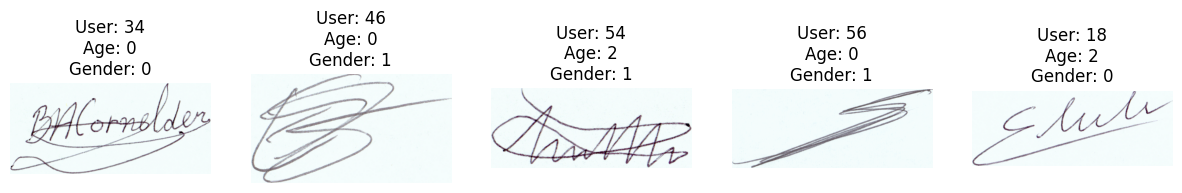

Sample Forged Signatures:


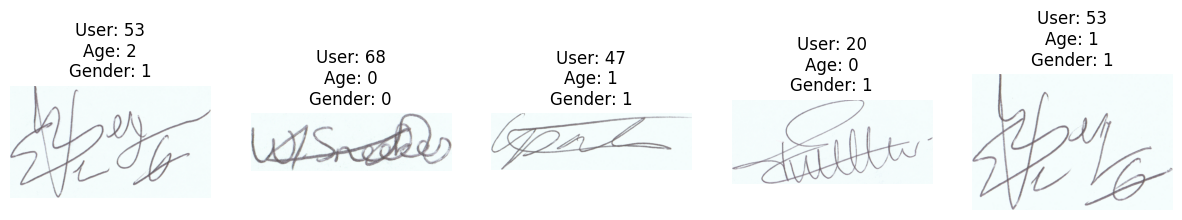

In [14]:
def show_samples(label, n=5):
    subset = df[df['is_genuine'] == label]
    sample = subset.sample(n)
    
    plt.figure(figsize=(15, 3))
    for i, row in enumerate(sample.itertuples()):
        img_path = os.path.join("data/processed/signatures", row.filename)
        img = Image.open(img_path)
        plt.subplot(1, n, i+1)
        plt.imshow(img, cmap='gray')
        plt.title(f"User: {row.user_id}\nAge: {row.age_group}\nGender: {row.gender}")
        plt.axis('off')
    plt.show()

print("Sample Genuine Signatures:")
show_samples(1)

print("Sample Forged Signatures:")
show_samples(0)


Images by Age Group/Gender

Samples for gender: 0


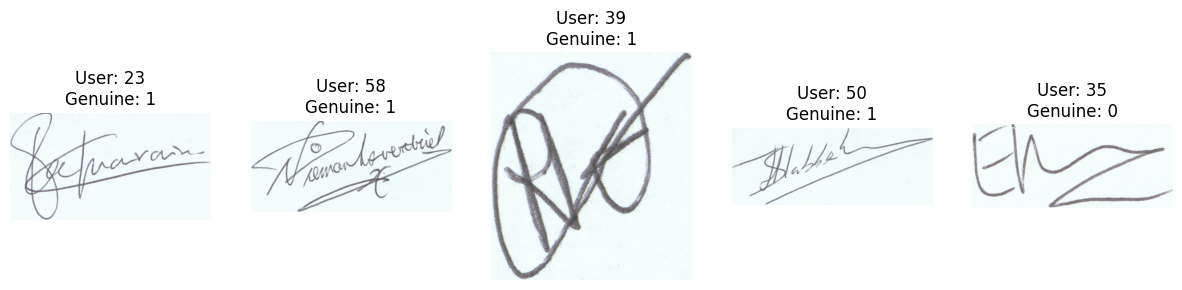

Samples for gender: 1


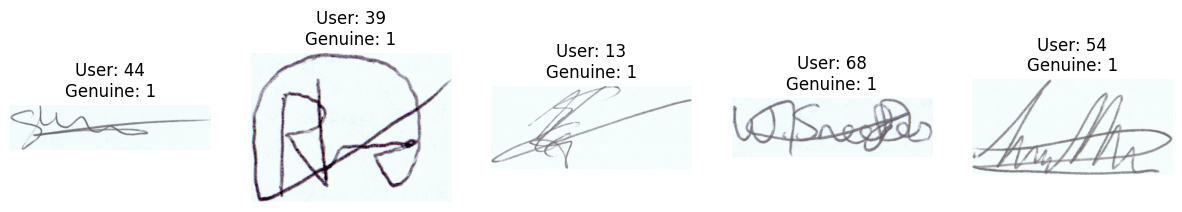

In [15]:
for gender in df['gender'].unique():
    print(f"Samples for gender: {gender}")
    subset = df[df['gender'] == gender]
    sample = subset.sample(5)
    
    plt.figure(figsize=(15, 3))
    for i, row in enumerate(sample.itertuples()):
        img_path = os.path.join("data/processed/signatures", row.filename)
        img = Image.open(img_path)
        plt.subplot(1, 5, i+1)
        plt.imshow(img, cmap='gray')
        plt.title(f"User: {row.user_id}\nGenuine: {row.is_genuine}")
        plt.axis('off')
    plt.show()


Images by Age Group or Gender

In [16]:
print("Missing values per column:")
print(df.isna().sum())

print("\nDuplicate rows:")
print(df.duplicated().sum())

Missing values per column:
filename      0
user_id       0
is_genuine    0
gender        0
age_group     0
dtype: int64

Duplicate rows:
0


Visualize signature counts per user

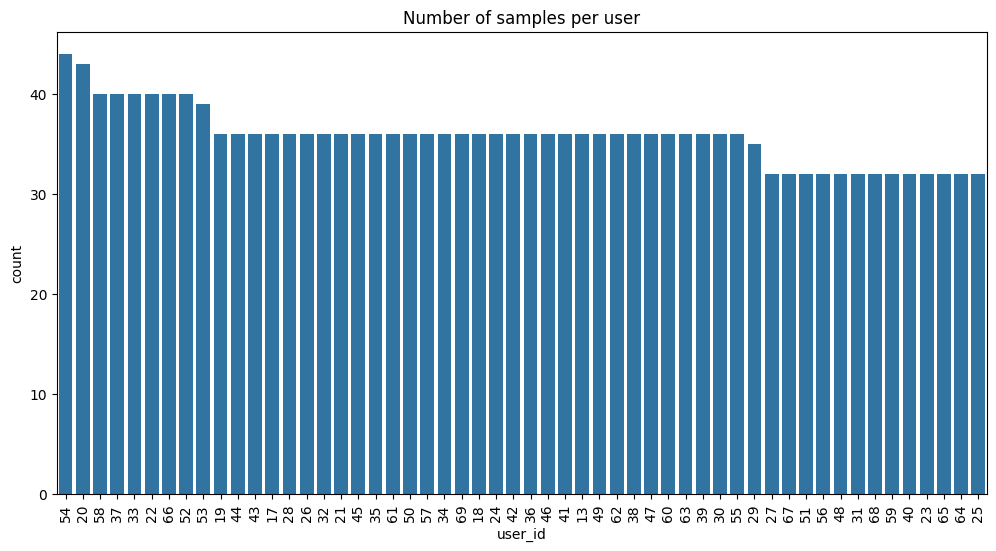

In [17]:
plt.figure(figsize=(12, 6))
sns.countplot(x='user_id', data=df, order=df['user_id'].value_counts().index)
plt.title("Number of samples per user")
plt.xticks(rotation=90)
plt.show()

Basic image stats

In [18]:
from PIL import Image

widths, heights = [], []
for f in df['filename'].sample(100):
    img = Image.open(os.path.join("data/processed/signatures", f))
    w, h = img.size
    widths.append(w)
    heights.append(h)

print(f"Image width range: {min(widths)} - {max(widths)}")
print(f"Image height range: {min(heights)} - {max(heights)}")


Image width range: 282 - 975
Image height range: 102 - 517
